# NIFTY RETURNS ANALYSIS AND FORECASTING PRICES


### What is Nifty?

***

Nifty or more accurately, Nifty 50 is the flagship benchmark of the National Stock Exchange (NSE), which is a well-diversified index, that represents the weighted average of 50 of the largest Indian companies listed on the National Stock Exchange. It is supposed to reflect the health of the listed universe of Indian companies, and hence the broader economy, in all market conditions.

The NIFTY 50 index covers 14 sectors (as on 20 Jun 2020) of the Indian economy and offers investment managers exposure to the Indian market in one portfolio. Between 2008 & 2012, the NIFTY 50 index's share of NSE's market capitalisation fell from 65% to 29% due to the rise of sectoral indices like NIFTY Bank, NIFTY IT, NIFTY Pharma, NIFTY SERV SECTOR, NIFTY Next 50, etc. The NIFTY 50 Index gives a weightage of 39.47% to financial services, 15.31% to Energy, 13.01% to IT, 12.38% to Consumer Goods, 6.11% to Automobiles and 0% to the agricultural sector.

***


***

## Why are we analysing NIFTY 50?

***

* It is a benchmark index that is very valuable as it is used assess the performance of the market.

* They use use a sample of stocks to represent the market as a whole.

* Stocks in the Nifty index are representative of the key sectors driving economic growth of India.

* They help assess market sentiment.

* It is used as a benchmark portfolio performance.

* They act as an underlying for Index Funds, Index Futures, and Options.

In [1]:
# importing necessary modules

import numpy as np
import pandas as pd
from pandas_datareader import data as wb
import matplotlib.pyplot as plt
from scipy.stats import norm
%matplotlib inline 

***

## 1. Analysis of Nifty 50

***

In [29]:
# Importing data via csv file. Data source: Kaggle

n_50= pd.read_csv('/Users/sriramsureshkumar/Desktop/CSV files/datasets_644702_1143107_NIFTY 50.csv', index_col= 'Date')
data= pd.DataFrame(n_50)

In [3]:
# taking a look at the data

data.head()

,Open,High,Low,Close,Volume,Turnover,P/E,P/B,Div Yield
Date,,,,,,,,,
2000-01-03,1482.15,1592.90,1482.15,1592.2,25358322.0,8.841500e+09,25.91,4.63,0.95
2000-01-04,1594.40,1641.95,1594.40,1638.7,38787872.0,1.973690e+10,26.67,4.76,0.92
2000-01-05,1634.55,1635.50,1555.05,1595.8,62153431.0,3.084790e+10,25.97,4.64,0.95
2000-01-06,1595.80,1639.00,1595.80,1617.6,51272875.0,2.531180e+10,26.32,4.70,0.94
2000-01-07,1616.60,1628.25,1597.20,1613.3,54315945.0,1.914630e+10,26.25,4.69,0.94


In [4]:
data.tail()

,Open,High,Low,Close,Volume,Turnover,P/E,P/B,Div Yield
Date,,,,,,,,,
2020-05-04,9533.50,9533.50,9266.95,9293.50,NaN,NaN,21.39,2.65,1.64
2020-05-05,9429.40,9450.90,9190.75,9205.60,725196178.0,2.970020e+11,21.19,2.62,1.65
2020-05-06,9226.80,9346.90,9116.50,9270.90,722185448.0,3.079810e+11,21.34,2.64,1.64
2020-05-07,9234.05,9277.85,9175.90,9199.05,708740416.0,5.970553e+11,21.18,2.62,1.65
2020-05-08,9376.95,9382.65,9238.20,9251.50,609053504.0,3.074345e+11,21.28,2.64,1.64


In [5]:
# summary of data

data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5061 entries, 2000-01-03 to 2020-05-08
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       5061 non-null   float64
 1   High       5061 non-null   float64
 2   Low        5061 non-null   float64
 3   Close      5061 non-null   float64
 4   Volume     5060 non-null   float64
 5   Turnover   5060 non-null   float64
 6   P/E        5061 non-null   float64
 7   P/B        5061 non-null   float64
 8   Div Yield  5061 non-null   float64
dtypes: float64(9)
memory usage: 395.4+ KB


In [6]:
# Since we need returns, considering closing prices

NIFTY_50= data['Close']

In [7]:
NIFTY_50.head()

Date
2000-01-03    1592.2
2000-01-04    1638.7
2000-01-05    1595.8
2000-01-06    1617.6
2000-01-07    1613.3
Name: Close, dtype: float64

***

### 1.1 NIFTY 50 Price trend over the years

***

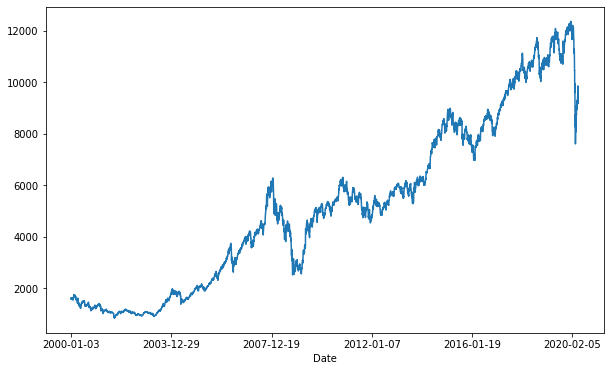

In [8]:
# Closing prices of NIFTY 50 displayed on a graph

NIFTY_50.plot(figsize=(10,6))
plt.show()

 

### The general price trend has been increasing over the years. This says the top 30 companies in India have been growing over the years and to some extent is true for the economy as well. There is a sudden huge drop at 2020, this is because of the COVID-19 pandemic.

***


In [9]:
# returns of nifty

log_returns1= np.log(NIFTY_50/NIFTY_50.shift(1))

In [10]:
log_returns1.head()

Date
2000-01-03         NaN
2000-01-04    0.028787
2000-01-05   -0.026528
2000-01-06    0.013568
2000-01-07   -0.002662
Name: Close, dtype: float64

***

### 1.2 NIFTY 50 returns trend

***

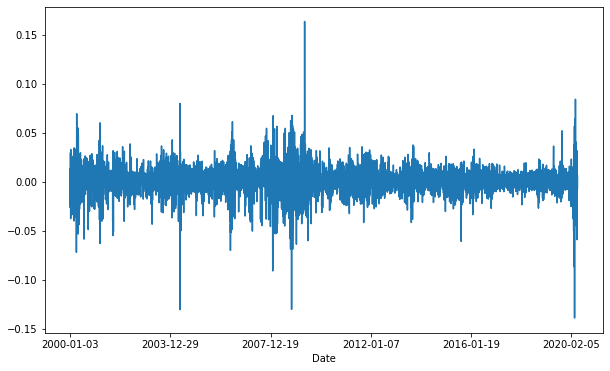

In [11]:
# plotting returns graph

log_returns1.plot(figsize=(10,6))
plt.show()

***

## 2. Comparing stock prices of a some of the biggest companies in India


### 2.1. These include Reliance industries, Tata Consultancy services, HDFC bank, ITC & Maruti Ltd.
***

In [39]:
# Obtaining data of these companies from yahoo finance

tickers= ['RELIANCE.NS', 'TCS.NS', 'ITC.NS', 'HDFCBANK.NS', 'MARUTI.NS']

com_data= pd.DataFrame()

for t in tickers:
    com_data[t]= wb.DataReader(t, data_source= 'yahoo', start='2005-1-1')['Adj Close']

In [41]:
com_data.head()

,RELIANCE.NS,TCS.NS,ITC.NS,HDFCBANK.NS,MARUTI.NS
Date,,,,,
2005-01-03,58.374298,91.689407,3.591364,29.250772,422.712372
2005-01-04,57.021900,90.876381,3.595056,28.927773,416.870697
2005-01-05,56.882381,89.774414,3.546652,27.847404,401.412750
2005-01-06,56.479889,89.466560,3.491677,27.017633,392.335754
2005-01-07,58.202560,90.788017,3.555943,27.301655,396.020477


In [42]:
com_data.tail()

,RELIANCE.NS,TCS.NS,ITC.NS,HDFCBANK.NS,MARUTI.NS
Date,,,,,
2020-07-17,1911.699951,2200.750000,194.050003,1098.449951,5919.500000
2020-07-20,1919.900024,2207.899902,192.699997,1133.050049,5867.500000
2020-07-21,1971.550049,2225.050049,192.250000,1138.550049,6130.850098
2020-07-22,2004.000000,2190.949951,196.550003,1126.349976,6003.399902
2020-07-23,2057.800049,2171.199951,200.699997,1130.400024,6065.950195


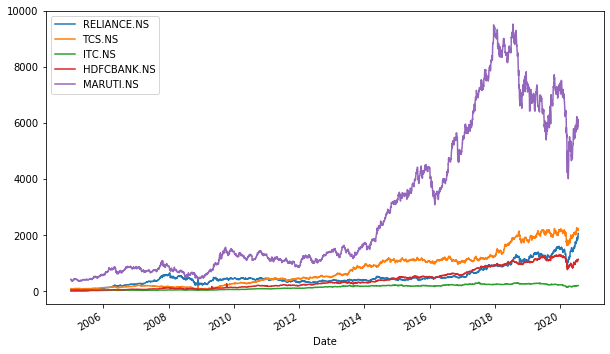

In [49]:
# Plotting closing prices on a graph

com_data.plot(figsize=(10,6))
plt.show()

### An important thing to note here is, the value of stock price of a company does not indicate the value of the company. This is because the no. of outstanding shares are different for different companies. This graph is just to understand changes of stock prices over the years for each company individually.
***

### As expected, a few months past the start of 2020, there is a steep drop in prices. This is induced by the coronavirus pandemic. But Reliance has shown a considerable increase in stock price. 
***

## 3. Analyzing and forecasting Reliance Industries stock price 
***

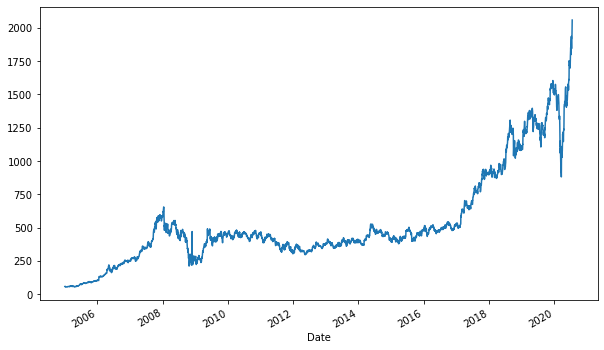

In [50]:
com_data['RELIANCE.NS'].plot(figsize=(10,6))
plt.show()

### After the steep drop due to the pandemic, there has been a considerable increase in stock price and the stock even hits an all-time high. This is because of he recent series of investments in Reliance by prominent companies and ventures like Facebook,  Silver lake, Vista Equity, KKR, General Atlantic etc.
***

In [43]:
log_returns2= np.log(1 + com_data.pct_change())

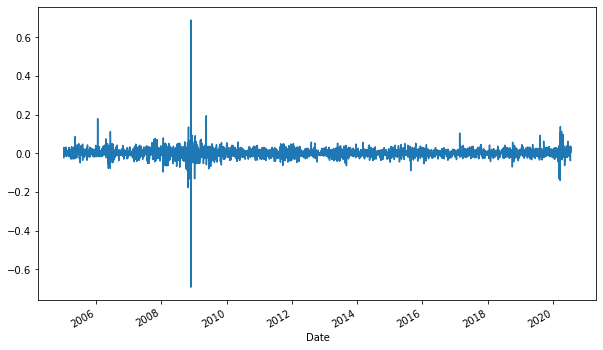

In [89]:
# plotting returns on graph

log_returns2['RELIANCE.NS'].plot(figsize=(10,6))
plt.show()

***
### 2.2. Forecasting Reliance stock price using Monte Carlo simulations
***

### Price Today = Price Yesterday * e^r

### r = ln ( price today / price yesterday )

In [81]:
# Calculating drift and standard deviation

u= log_returns2['RELIANCE.NS'].mean()
var= log_returns2['RELIANCE.NS'].var()

In [82]:
drift= u - (0.5*var)
drift

0.0005763529129918709

In [85]:
std_dev= log_returns2['RELIANCE.NS'].std()

In [70]:
# No. of days upto which u want to predict prices
t_intervals= 1000

# No. of simulations of predicted prices
iterations= 10

In [87]:
# Getting e^r

daily_r= np.exp( np.array(drift) + np.array(std_dev) * norm.ppf(np.random.rand(t_intervals, iterations)))

In [95]:
price_today= com_data['RELIANCE.NS'].iloc[-1]

In [97]:
# storing predicted prices in an array

price_list= np.zeros_like(daily_r)

price_list[0]= price_today

for num in range(1, t_intervals):
    price_list[num]= price_list[num - 1] * daily_r[num]

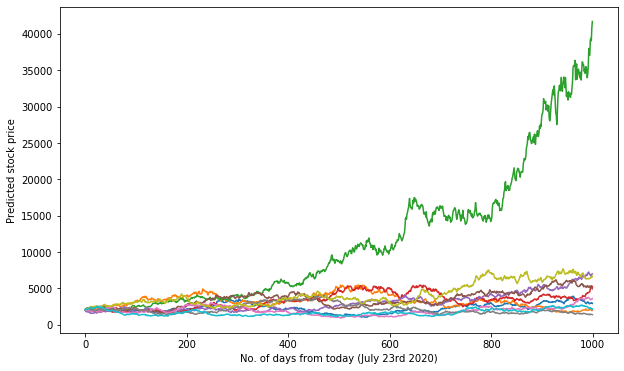

In [101]:
# plotting forecasted prices on a graph

plt.figure(figsize=(10,6))
plt.plot(price_list)
plt.xlabel('No. of days from today (July 23rd 2020)')
plt.ylabel('Predicted stock price')
plt.show()

### There are 10 lines on the graph which indicate 10 different simulations.
***